# LOAN APPROVAL PREDICTION

In [9]:
import pandas as pd
import numpy as nm
import matplotlib as plt
%matplotlib inline

df = pd.read_csv('C:/IMP FILES/DATASETS/loan_approval_dataset.csv')

In [10]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [11]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [18]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


# Data visualization 

<Axes: title={'center': ' income_annum'}, xlabel=' education'>

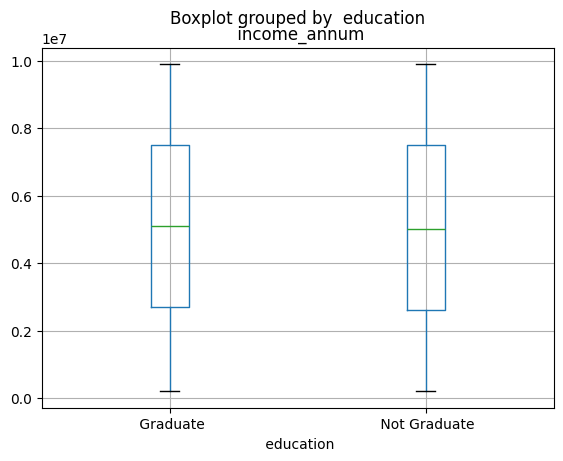

In [19]:
df.boxplot(column=' income_annum', by=' education')

<Axes: >

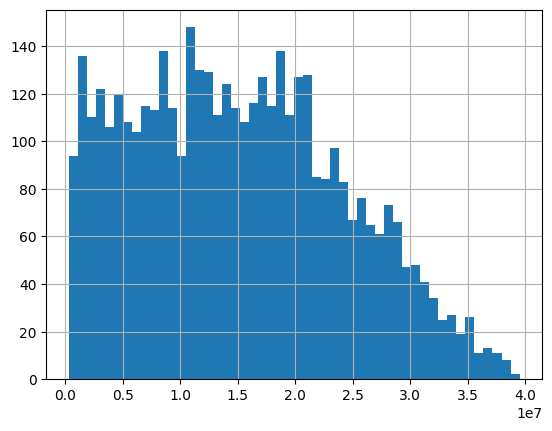

In [21]:
df[' loan_amount'].hist(bins=50)

<Axes: >

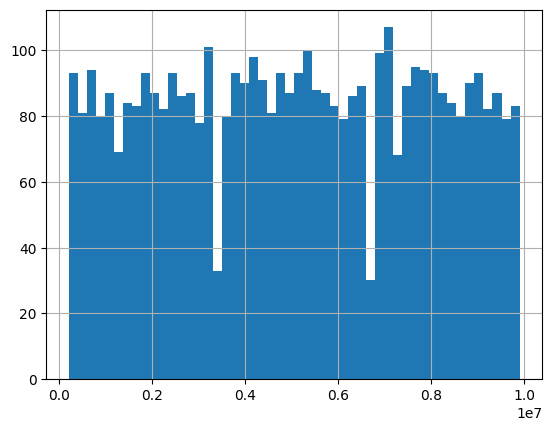

In [22]:
df[' income_annum'].hist(bins=50)

# Data Wrangling (cleaning up data)

In [23]:
df.apply(lambda x: sum(x.isnull()), axis=0) #no missing values

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [24]:
#if data is missing in large number in any column, use mean value to fill up empty places. here no data is missing

# Building the prediction model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:
x = df.iloc[:,[5,7]].values #independet- cibil score & loan amt
y = df.iloc[:,[12]].values #dependent status

In [29]:
from sklearn.model_selection import train_test_split #split data into training data and testing data in a 75-25 ratio
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler #scaling
scx = StandardScaler()
xtrain = scx.fit_transform(xtrain)
xtest = scx.fit_transform(xtest)

In [32]:
mod = LogisticRegression(random_state = 0)
mod.fit(xtrain, ytrain)

C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [33]:
pred = mod.predict(xtest)
pred

array([' Approved', ' Approved', ' Approved', ..., ' Approved',
       ' Rejected', ' Approved'], dtype=object)

In [34]:
from sklearn.metrics import confusion_matrix #diagonal values are true values ; 622 & 359
cm = confusion_matrix(ytest,pred)
cm

array([[622,  37],
       [ 50, 359]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score #to check accuracy of model. we got a 91.8% accurate model
accuracy_score(ytest,pred)

0.9185393258426966